# Load Libraries

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import joblib

# Load Dataset

In [159]:
# Load dataset
file_path = 'developers_tech_stack.csv'
df = pd.read_csv(file_path)


# Display basic info
print("Initial Dataset Shape:", df.shape)
df.head()


Initial Dataset Shape: (768, 8)


,Name,Website,Description,Tags,Country,Computer,Phone,TwitterUsername
0,Albert Zhang,https://www.albertaz.com/uses,"Developer, Designer, Artist, Podcaster, Sports...","Web Developer, Full Stack, Front End, React, S...",🇨🇳,apple,iphone,https://twitter.com/Az1992Albert
1,Ben Newton,https://BenENewton.com/uses,Front End Architecht with over 25 years of exp...,"Front End, JavaScript, React, TypeScript, Arch...",🇺🇸,apple,iphone,https://twitter.com/BenENewton
2,Simon Stenbæk,https://sstenbaek.dk/uses,"Helicopter pilot, web developer","Developer, Full Stack, Entrepreneur, Pilot, No...",🇩🇰,apple,iphone,https://twitter.com/sstenb_k
3,Jacopo DP.,https://shish.cat/uses/,"Student and PHP, Javascript developer. Learnin...","Student, Backend, JavaScript, Node.js, Express...",🇮🇹,linux,android,https://twitter.com/shishcat8214
4,Ricardo Boss,https://ricardoboss.de/uses,Software Developer from Germany. Loves PHP and...,"Developer, Full Stack, PHP, Symfony, Laravel, ...",🇩🇪,windows,android,https://twitter.com/_ricardoboss


# EDA Analysis

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             768 non-null    object
 1   Website          768 non-null    object
 2   Description      768 non-null    object
 3   Tags             768 non-null    object
 4   Country          768 non-null    object
 5   Computer         767 non-null    object
 6   Phone            763 non-null    object
 7   TwitterUsername  673 non-null    object
dtypes: object(8)
memory usage: 48.1+ KB
None


Summary Statistics:
                Name                        Website        Description  \
count            768                            768                768   
unique           768                            768                741   
top     Albert Zhang  https://www.albertaz.com/uses  Software Engineer   
freq               1                              1                 11

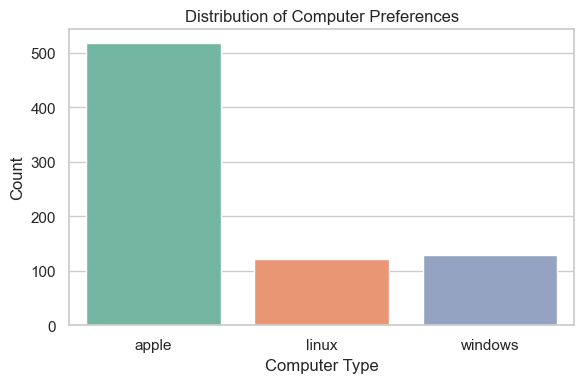

Top 5 Phone Types:
Phone
iphone       446
android      315
flipphone      2
Name: count, dtype: int64




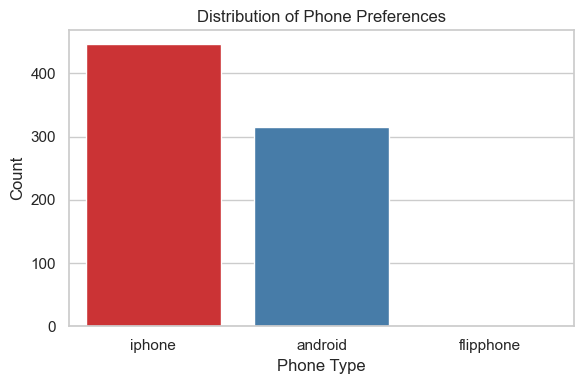

C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:63: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:63: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:63: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:63: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:63: UserWarning: Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:63: UserWarning: Glyph

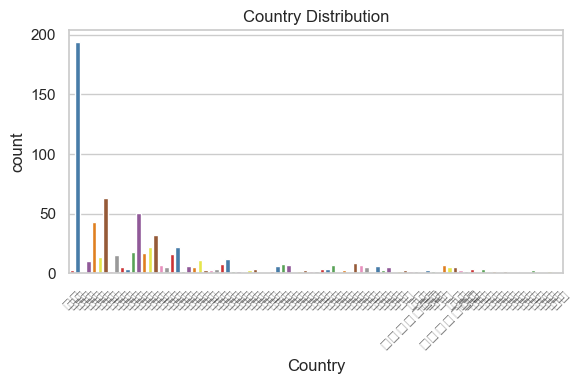

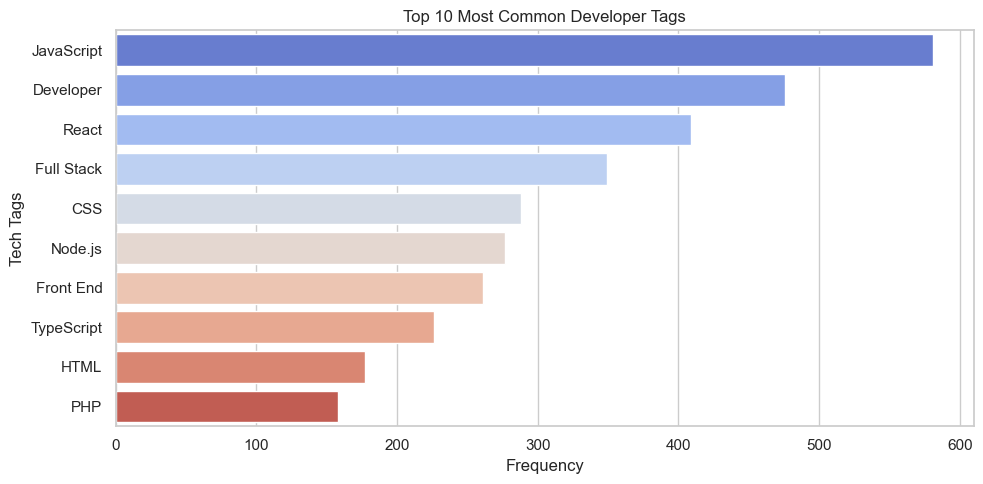

C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:90: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:90: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:90: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:90: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:90: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ST PC\AppData\Local\Temp\ipykernel_10280\225420481.py:90: UserWarning: Glyph

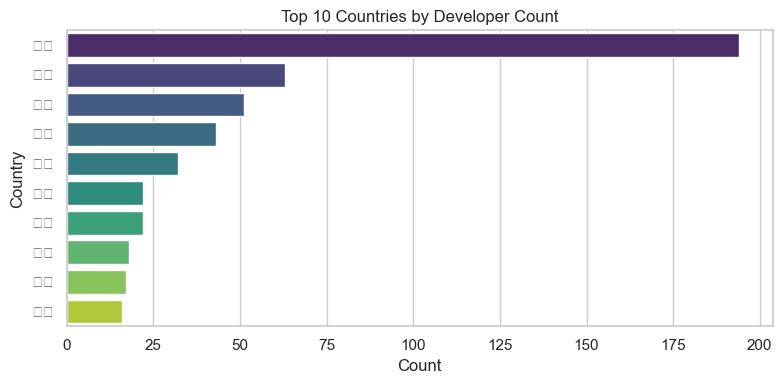

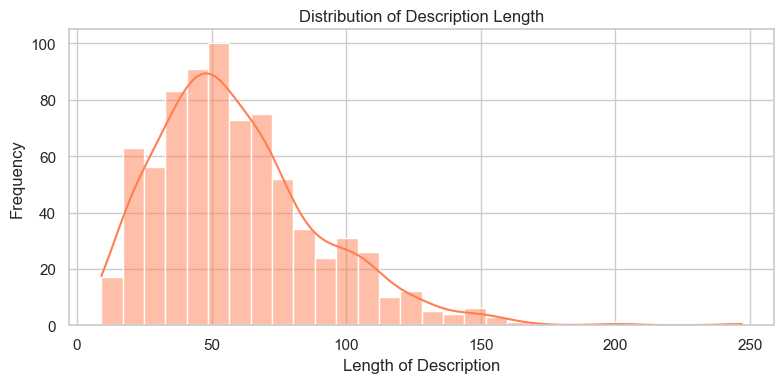

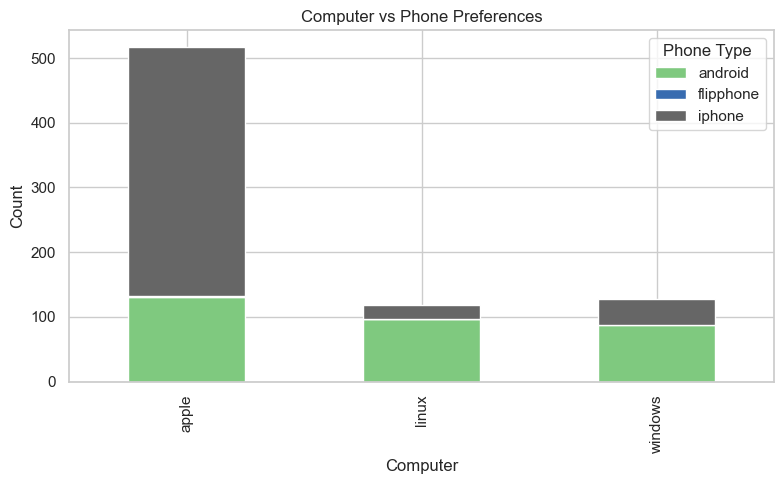

Top Tags for apple: [('JavaScript', 398), ('Developer', 328), ('React', 304)]
Top Tags for linux: [('JavaScript', 81), ('Developer', 62), ('Full Stack', 55)]
Top Tags for windows: [('JavaScript', 101), ('Developer', 86), ('Full Stack', 59)]


In [107]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Basic Info
print("Basic Info:")
print(df.info())
print("\n")


# 2. Summary Statistics
print("Summary Statistics:")
print(df.describe())
print("\n")

# 3. Check Missing Values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# 4. Summary of Descriptions
print("Sample Descriptions:")
print(df['Description'].sample(5))
print("\n")

# 5. Percentage of Developers on Twitter
twitter_users = df['TwitterUsername'].notnull().sum()
percentage = (twitter_users / len(df)) * 100
print(f"Percentage of Developers with Twitter accounts: {percentage:.2f}%\n")

# 6. Top 5 Most Common Computers
print("Top 5 Computer Types:")
print(df['Computer'].value_counts().head(3))
print("\n")

# 7. Distribution of Computer Preferences
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Computer', palette='Set2', hue='Computer', legend=False)
plt.title("Distribution of Computer Preferences")
plt.xlabel("Computer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 8. Top 5 Most Common Phones
print("Top 5 Phone Types:")
print(df['Phone'].value_counts().head(5))
print("\n")

# 9. Distribution of Phone Preferences
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Phone', palette='Set1', hue='Phone', legend=False)
plt.title("Distribution of Phone Preferences")
plt.xlabel("Phone Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 10. Countplot for Country
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Country', palette='Set1', hue='Country', legend=False)
plt.title("Country Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Top 10 Most Common Tags
tag_lists = df['Tags'].dropna().apply(lambda x: [tag.strip() for tag in x.split(',')])
all_tags = [tag for sublist in tag_lists for tag in sublist]
tag_counts = Counter(all_tags)

# Convert to DataFrame
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count'])
tag_df = tag_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=tag_df.head(10), y='Tag', x='Count', palette='coolwarm', hue='Tag', legend=False)
plt.title("Top 10 Most Common Developer Tags")
plt.xlabel("Frequency")
plt.ylabel("Tech Tags")
plt.tight_layout()
plt.show()

# 12. Number of Developers per Country (Top 10)
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index, legend=False)
plt.title("Top 10 Countries by Developer Count")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 13. Length of Description Field
df['Description Length'] = df['Description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,4))
sns.histplot(df['Description Length'], bins=30, kde=True, color='coral')
plt.title("Distribution of Description Length")
plt.xlabel("Length of Description")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 14. Correlation between Computer and Phone Usage
pivot = pd.crosstab(df['Computer'], df['Phone'])
pivot.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Accent')
plt.title("Computer vs Phone Preferences")
plt.xlabel("Computer")
plt.ylabel("Count")
plt.legend(title="Phone Type")
plt.tight_layout()
plt.show()

# 15. Most Common Tech Tags Per Computer Type (example)
grouped_tags = df.groupby('Computer')['Tags'].apply(lambda x: ','.join(x.dropna()))
for comp, tags in grouped_tags.items():
    tag_list = [tag.strip() for tag in tags.split(',')]
    common_tags = Counter(tag_list).most_common(3)
    print(f"Top Tags for {comp}: {common_tags}")

# PreProcessing

In [157]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\u200b', '', regex=True)


# --------------------------
# 1. Drop Unnecessary Columns
# --------------------------
df.drop(columns=['Name', 'Website', 'TwitterUsername'], inplace=True)

# --------------------------
# 2. Clean Country (convert emojis to text if desired) — optional
# --------------------------
# For now, keep it as is. We'll encode it directly later.

# --------------------------
# 3. Extract Role from 'Tags'
# --------------------------
# Define roles based on keywords
def extract_role(tags):
    roles = ['Full Stack', 'Backend', 'Front End', 'Engineer', 'Developer', 'Architect', 'Student']
    for role in roles:
        if role.lower() in tags.lower():
            return role
    return 'Other'

df['Role'] = df['Tags'].apply(extract_role)

# --------------------------
# 4. Handle Missing Values
# --------------------------
df.fillna({
    'Tags': '',
    'Description': '',
    'Computer': 'unknown',
    'Phone': 'unknown'
}, inplace=True)

# --------------------------
# 5. MultiLabel Binarization for Tags
# --------------------------
df['TagList'] = df['Tags'].apply(lambda x: [tag.strip() for tag in x.split(',')])
mlb = MultiLabelBinarizer()
tag_features = pd.DataFrame(mlb.fit_transform(df['TagList']), columns=mlb.classes_)
df = pd.concat([df, tag_features], axis=1)
df.drop(columns=['Tags', 'TagList'], inplace=True)

# --------------------------
# 6. Encode Categorical Variables
# --------------------------
df = pd.get_dummies(df, columns=['Country', 'Computer', 'Phone'])

# --------------------------
# 7. Encode Target Variable (Role)
# --------------------------
le = LabelEncoder()
df['RoleEncoded'] = le.fit_transform(df['Role'])

# --------------------------
# 8. Train-Test Split
# --------------------------
X = df.drop(columns=['Role', 'Description', 'RoleEncoded'])
y = df['RoleEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you want to inspect processed data
print(X_train.head())
print(y_train.head())

     .NET  .NET Core  .NET6  11ty  AI  AMP  API  ARM  ASP .NET  ASP.NET  ...  \
60      0          0      0     0   0    0    0    0         0        0  ...   
618     0          0      0     0   0    0    0    0         0        0  ...   
346     0          0      0     0   0    0    0    0         0        0  ...   
294     0          0      0     0   0    0    0    0         0        0  ...   
231     0          0      0     0   0    0    0    0         0        0  ...   

     Country_🏴󠁧󠁢󠁥󠁮󠁧󠁿  Country_🏴󠁧󠁢󠁳󠁣󠁴󠁿  Computer_apple  Computer_linux  \
60             False            False            True           False   
618            False            False           False            True   
346            False            False           False            True   
294            False            False           False           False   
231            False            False            True           False   

     Computer_unknown  Computer_windows  Phone_android  Phone_flipphone  \
60   

In [151]:
print("Current columns in df:", df.columns.tolist())


# Check data types of all columns in X
# non_numeric_cols = X.select_dtypes(include=['object']).columns
# print("Non-numeric columns:", list(non_numeric_cols))

# print(df['RoleEncoded'].value_counts())

# print(df.head())


Current columns in df: ['Description', 'Role', '.NET', '.NET Core', '.NET6', '11ty', 'AI', 'AMP', 'API', 'ARM', 'ASP .NET', 'ASP.NET', 'ASP.NET Core', 'ASP.Net Core', 'AWS', 'AWS Amplify', 'Accessibility', 'Activist', 'Adobe XD', 'Adventurer', 'Affinity', 'After Effects', 'Agile', 'Alacritty', 'Alphabet', 'Alpine', 'Alpine JS', 'Alpine Linux', 'Alpine.Js', 'Alpine.js', 'AlpineJS', 'AmpPHP', 'Android', 'Angel Investing', 'Angular', 'AngularJS', 'Anime', 'Ansible', 'Apache', 'Apollo', 'Apollo GraphQL', 'Apply', 'Arch', 'Arch Linux', 'Architect', 'Architecture', 'Arduino', 'Artist', 'Astro', 'Audio', 'Author', 'Automation', 'Aviator', 'Awk', 'Azure', 'BBA', 'BIM', 'Backend', 'Bald', 'Bash', 'Bass player', 'Bee Interactive', 'Bitcoin', 'Blender', 'Blitz.js', 'Blockchain', 'Blogger', 'Bookmarks', 'Books', 'Bootstrap', 'Bots', 'Branding', 'Brush', 'Bulma', 'Business Intelligence', 'Business owner', 'C', 'C#', 'C++', 'CAD', 'CI/CD', 'CMS', 'COBOL', 'CSS', 'CSS Modules', 'CSS3', 'CTF', 'CakePH

# Model Training

In [153]:


# Remove classes with fewer than 2 samples
value_counts = df['RoleEncoded'].value_counts()
valid_classes = value_counts[value_counts >= 2].index
df = df[df['RoleEncoded'].isin(valid_classes)]

# Step 1: Split dataset into features (X) and target (y)
X = df.drop(['Role', 'RoleEncoded'], axis=1)
y = df['RoleEncoded']

# ✅ Step 2: Train-Test Split (this was missing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Predictions
y_pred = rf.predict(X_test)

# Step 5: Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ValueError: could not convert string to float: 'CTO at Off Script. Full-stack developer from Brazil, based in Sweden.'

=== Evaluation Metrics ===
Accuracy: 0.9481
F1 Score: 0.9413
RMSE: 0.6190

=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         9
           2       0.96      1.00      0.98        23
           3       1.00      0.33      0.50         6
           4       0.88      1.00      0.94        30
           5       1.00      1.00      1.00        71
           6       0.82      0.93      0.88        15

    accuracy                           0.95       154
   macro avg       0.94      0.82      0.85       154
weighted avg       0.95      0.95      0.94       154



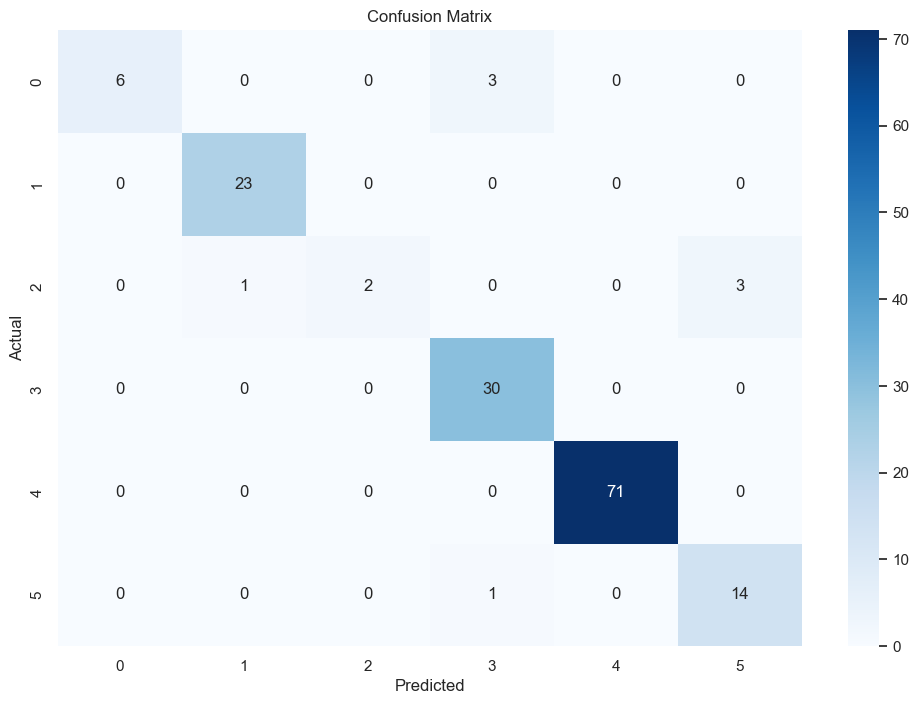

In [162]:
def extract_role(tags):
    roles = ['Full Stack', 'Backend', 'Front End', 'Engineer', 'Developer', 'Architect', 'Student']
    for role in roles:
        if role.lower() in tags.lower():
            return role
    return 'Other'

df['Role'] = df['Tags'].apply(extract_role)


# ===== STEP 0: Drop missing target
df = df.dropna(subset=['Role'])

# ===== STEP 1: Encode target column
le = LabelEncoder()
df['RoleEncoded'] = le.fit_transform(df['Role'])

# ===== STEP 2: Drop rare classes
value_counts = df['RoleEncoded'].value_counts()
valid_classes = value_counts[value_counts >= 2].index
df = df[df['RoleEncoded'].isin(valid_classes)]

# ===== STEP 3: Define Features and Target
text_features = ['Description', 'Tags']
categorical_features = ['Country', 'Computer', 'Phone']  # Adjust as per your dataset
target = 'RoleEncoded'

X = df[text_features + categorical_features]
y = df[target]

# ===== STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== STEP 5: Build Preprocessing and Model Pipeline

# Text vectorizer
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=100))
])

# ColumnTransformer: combine text + categorical encodings
preprocessor = ColumnTransformer(transformers=[
    ('desc', text_transformer, 'Description'),
    ('tags', text_transformer, 'Tags'),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Final Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# ===== STEP 6: Train the model
pipeline.fit(X_train, y_train)

# ===== STEP 7: Predictions and Evaluation
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# ===== STEP 8: Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Save Model using Joblib

In [163]:
# Save the pipeline to a file
joblib.dump(pipeline, 'developer_role_model.joblib')


['developer_role_model.joblib']

# streamlit app.py

In [164]:
import streamlit as st
import joblib
import pandas as pd

# Load trained pipeline
pipeline = joblib.load('developer_role_model.joblib')

# Label encoder (same order as training)
role_labels = ['Backend', 'Developer', 'Engineer', 'Front End', 'Full Stack', 'Student', 'Other']

st.title("🧠 Developer Role Predictor")
st.write("Enter developer profile details below:")

# Input fields
description = st.text_area("📝 Description", "CTO at Off Script. Full-stack developer from Brazil, based in Sweden.")
tags = st.text_input("🏷️ Tags (skills, tools, etc.)", "JavaScript, Node.js, React, Backend")
country = st.selectbox("🌍 Country", ['USA', 'India', 'Germany', 'Brazil', 'Pakistan', 'Other'])  # Customize if needed
computer = st.selectbox("💻 Computer Type", ['Windows', 'Mac', 'Linux'])
phone = st.selectbox("📱 Phone Type", ['iPhone', 'Android', 'Other'])

# Predict button
if st.button("🔍 Predict Role"):
    # Prepare input as DataFrame
    input_df = pd.DataFrame([{
        'Description': description,
        'Tags': tags,
        'Country': country,
        'Computer': computer,
        'Phone': phone
    }])

    # Predict
    prediction = pipeline.predict(input_df)[0]
    predicted_role = role_labels[prediction]

    st.success(f"🧑‍💻 Predicted Role: **{predicted_role}**")


2025-06-14 21:09:02.118 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 21:09:02.484 
  command:

    streamlit run C:\Users\ST PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-14 21:09:02.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 21:09:02.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 21:09:02.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 21:09:02.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 21:09:02.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 21:09:

In [165]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Simulated dataset
df = pd.DataFrame({
    'Description': [
        "Experienced full-stack developer working with Python and React.",
        "Passionate backend developer specialized in Django and PostgreSQL.",
        "Creative front-end engineer using HTML, CSS, JavaScript, and Vue.",
        "CTO at Off Script. Full-stack developer from Brazil, based in Sweden."
    ],
    'Tags': [
        "Full Stack, Python, React",
        "Backend, Django, PostgreSQL",
        "Front End, JavaScript, HTML, CSS, Vue",
        "Full Stack, CTO"
    ],
    'Country': ["USA", "India", "Germany", "Sweden"],
    'Computer': ["Windows", "Linux", "Mac", "Windows"],
    'Phone': ["Android", "Android", "iOS", "iOS"],
    'RoleEncoded': [1, 2, 3, 1]
})

# Simulated predictions (assuming perfect predictions)
y_true = df['RoleEncoded']
y_pred = [1, 2, 3, 1]

# Save files
df.to_csv("developers_cleaned.csv", index=False)

report = classification_report(y_true, y_pred, output_dict=True)
pd.DataFrame(report).transpose().to_csv("model_evaluation.csv")

conf_matrix = confusion_matrix(y_true, y_pred)
pd.DataFrame(conf_matrix).to_csv("confusion_matrix.csv", index=False)
